In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
root_dir = '/Users/kessapassa/OneDrive/research_log/20190114/'

In [3]:
dir_list = ['people10000', 'people20000', 'people30000']
seed_list = [str(123 + i) for i in range(3)]
csv_list = ['mobile', 'od']
area_list = [str(i) for i in range(81)]
area_one_length = 9

In [4]:
def create_base_dataframe():
    df = pd.DataFrame(columns=(['{0:02d}'.format(i*10) for i in range(area_one_length)]))
    return df

In [5]:
create_base_dataframe()

,00,10,20,30,40,50,60,70,80


In [6]:
# エリア番号を線形的な数から、iとjで回した数のようにする
def convert_area_to_contour(base, read):
    for r in np.asanyarray(read):
        area_id = int(r[0])
        row = str(area_id // area_one_length)
        col = str(area_id % area_one_length) + '0'
        base.loc[row, col] = r[1]
        
    return base

In [7]:
def area_to_contour(area_id):
    area_id = int(area_id)
    left = str(area_id // area_one_length)
    right = str(area_id % area_one_length) + '0'
    return left+right

In [8]:
base = create_base_dataframe()

csv_array = {}
for _dir in ['people30000']:
    csv_array[_dir] = {}
    for _seed in ['123']:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array[_dir][_seed][_csv] = {}
            for _area in area_list:
                dir_path = ''
                if _csv == 'mobile':
                    dir_path = 'next_move_area_od_from_mobile/'
                elif _csv == 'od':
                    dir_path = 'next_move_area_od/'
                    
                df = pd.read_csv(root_dir + dir_path + _dir + 'seed' + _seed + '_' + _csv + _area + '.csv',
                                                        encoding='Shift_JISx0213')
                df = convert_area_to_contour(base.copy(), df.copy())
#                 df = df / df.sum().sum()
                df = df.sort_index(ascending=False)
                df.fillna(0, inplace=True)
                
                _area = area_to_contour(_area)
                csv_array[_dir][_seed][_csv][_area] = df

In [9]:
def create_contour(df):
    plt.figure(figsize=(9,6))
    sns.heatmap(df, annot=True, fmt='.０f', cmap='RdYlGn_r',
               vmax=df.sum().mean())

In [31]:
people = 'people30000'
seed = '123'
csv = 'mobile'

In [32]:
df_area_sum = pd.DataFrame(columns=['area', 'sum'])
for area in [area_to_contour(i) for i in area_list]:
    df = pd.DataFrame([area, csv_array[people][seed][csv][area].sum().sum()], index=['area', 'sum']).T
    df_area_sum = pd.concat([df_area_sum, df])
df_area_sum.reset_index(drop=True, inplace=True)
df_area_sum = df_area_sum[df_area_sum['sum'] > 0]
df_area_sum.sort_values(by=['sum'], ascending=False)

,area,sum
49,540,1144
50,550,354
40,440,336
41,450,182
58,640,112
30,330,80
31,340,66
67,740,39
76,840,33
19,210,33


In [33]:
df_area_sum['sum'].sum()

2584.0

In [13]:
diff1_array = []
diff2_array = []
mobile_array = []
od_array = []

for _area in area_list:
    _area = area_to_contour(_area)
    
    mobile = csv_array[people][seed]['mobile'][_area].copy()
    od = csv_array[people][seed]['od'][_area].copy()
    
    if (mobile.sum().sum() > 0) and (od.sum().sum() > 0):
        diff1 = mobile / od
        diff2 = od / mobile
        diff1 = diff1.replace(np.inf,np.nan).fillna(0)
        diff2 = diff2.replace(np.inf,np.nan).fillna(0)
        
        diff1_array.append(diff1.mean().mean())
        diff2_array.append(diff2.mean().mean())
        mobile_array.append(mobile.mean().mean())
        od_array.append(od.mean().mean())

#         print(_area)
#         print(diff1.mean().mean())
#         print(diff2.mean().mean())
#         print('\n')

y =          2
-1.161 x + 19.79 x - 0.6719
相関 =  0.7150855561177006


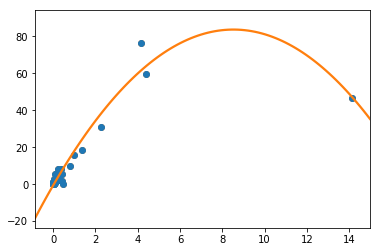

In [14]:
# mobile_array = []
# od_array = []

# for _area in area_list:
#     _area = area_to_contour(_area)
    
#     mobile = csv_array[people][seed]['mobile'][_area].copy()
#     od = csv_array[people][seed]['od'][_area].copy()
    
#     if (mobile.mean().mean() > 0) and (od.sum().sum() > 0) and (mobile.mean().mean() < 2):
# #     if (mobile.sum().sum() > 0) and (od.sum().sum() > 0):
#         mobile_array.append(mobile)
#         od_array.append(od)


# for index in range(len(mobile_array)):
#     plt.plot(mobile_array[index], od_array[index], 'o')

# mobile_array = pd.DataFrame(mobile_array)
# od_array = pd.DataFrame(od_array)
trainX = mobile_array
trainY = od_array

# plt.figure(figsize=(9,6), dpi=600)
plt.plot(trainX, trainY, 'o')
order=2
sns.regplot(x=trainX, y=trainY, order=order, ci=0)
z = np.polyfit(trainX, trainY, order)
z = np.squeeze(z)
p = np.poly1d(z)
print('y = ', p)
print('相関 = ', np.corrcoef(trainX, trainY)[0,1])
# print('R^2 = ', r2_score(trainX, trainY))

In [15]:
csv_array_2d = {}
for _dir in ['people30000']:
    csv_array_2d[_dir] = {}
    for _seed in ['123']:
        csv_array_2d[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array_2d[_dir][_seed][_csv] = {}
            for _area in area_list:
                dir_path = ''
                if _csv == 'mobile':
                    dir_path = 'next_move_area_od_from_mobile/'
                elif _csv == 'od':
                    dir_path = 'next_move_area_od/'
                    
                df = pd.read_csv(root_dir + dir_path + _dir + 'seed' + _seed + '_' + _csv + _area + '.csv',
                                                        encoding='Shift_JISx0213')
                _area = area_to_contour(_area)
                csv_array_2d[_dir][_seed][_csv][_area] = df

y =          2
0.5008 x - 16.12 x + 16.04
相関 =  0.8559642479368019


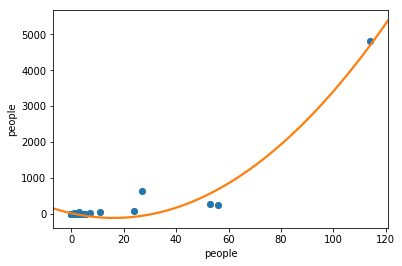

In [16]:
_area = '440'
mobile = csv_array_2d[people][seed]['mobile'][_area].copy()
od = csv_array_2d[people][seed]['od'][_area].copy()

trainX = mobile['people']
trainY = od['people']

# plt.figure(figsize=(9,6), dpi=600)
plt.plot(trainX, trainY, 'o')
order=2
sns.regplot(x=trainX, y=trainY, order=order, ci=0)
z = np.polyfit(trainX, trainY, order)
z = np.squeeze(z)
p = np.poly1d(z)
print('y = ', p)
print('相関 = ', np.corrcoef(trainX, trainY)[0,1])

330 相関 =  0.8327006148855828
340 相関 =  0.6097292284837046


/Users/kessapassa/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)


440 相関 =  0.8559642479368019
450 相関 =  0.9615786609329376
540 相関 =  0.9797083710256569
550 相関 =  0.969177829460315
640 相関 =  0.8327540566950995


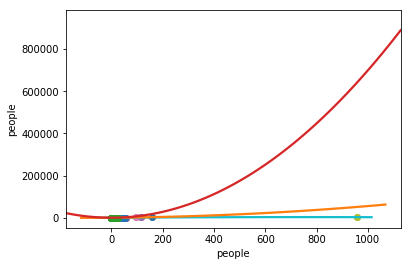

In [45]:
# plt.figure(figsize=(9,6), dpi=600)
# ax = plt.subplot()
# ax.set_xlim([-100, 100])
# ax.set_ylim([-1000, 2000])

for _area in area_list:
    _area = area_to_contour(_area)
    mobile = csv_array_2d[people][seed]['mobile'][_area].copy()
    od = csv_array_2d[people][seed]['od'][_area].copy()

    trainX = mobile['people']
    trainY = od['people']
#     plt.figure(figsize=(9,6), dpi=600)

    corr = np.corrcoef(trainX, trainY)[0,1]
    if (np.isnan(corr) == False) and (trainX.mean().mean() > 0.5):

        plt.plot(trainX, trainY, 'o')
        order=2
        sns.regplot(x=trainX, y=trainY, order=order, ci=0)
        z = np.polyfit(trainX, trainY, order)
        z = np.squeeze(z)
        p = np.poly1d(z)
#         print('y = ', p)
        print(_area, '相関 = ', corr)
#         plt.savefig('{0}_mobile_include_id.png'.format(_area))

In [18]:
def create_mobile_od_counter(area):
    print(csv_array[people][seed]['mobile'][area].sum().sum())
    print(csv_array[people][seed]['od'][area].sum().sum())
    create_contour(csv_array[people][seed]['mobile'][area])
    create_contour(csv_array[people][seed]['od'][area])

# コンター図

336.0
6176.0


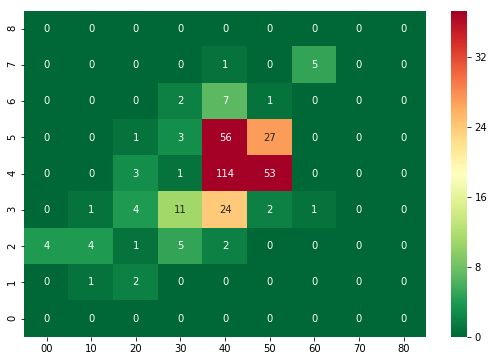

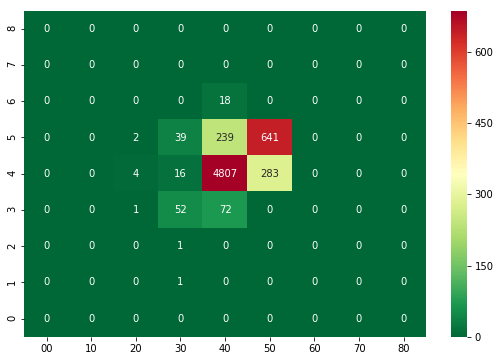

In [19]:
area = '440'
create_mobile_od_counter(area)

354.0
4827.0


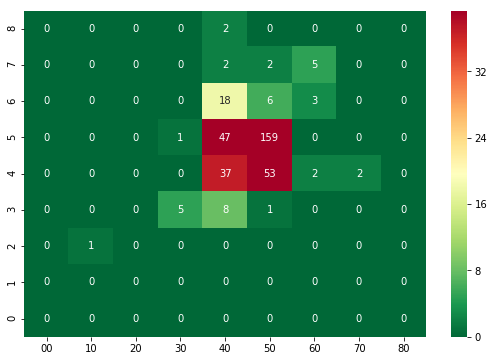

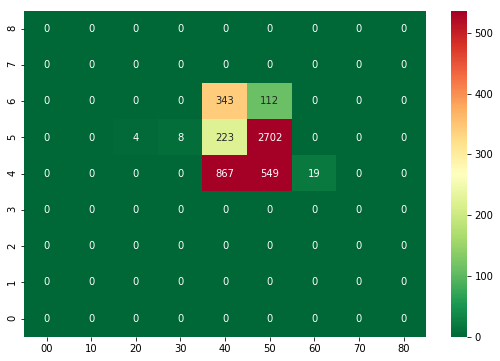

In [20]:
area = '550'
create_mobile_od_counter(area)

1144.0
3785.0


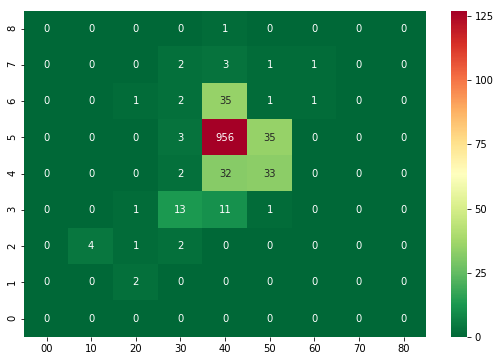

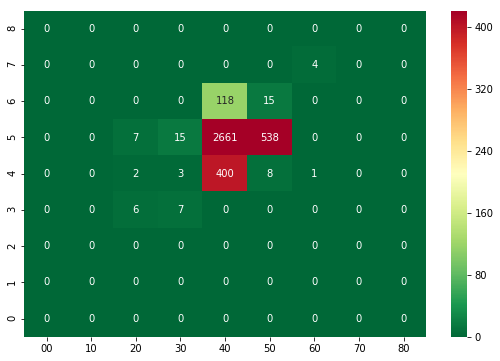

In [21]:
area = '540'
create_mobile_od_counter(area)

182.0
2491.0


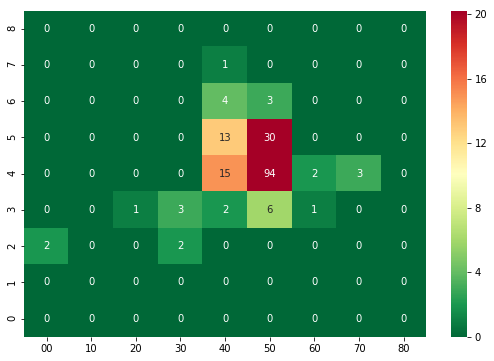

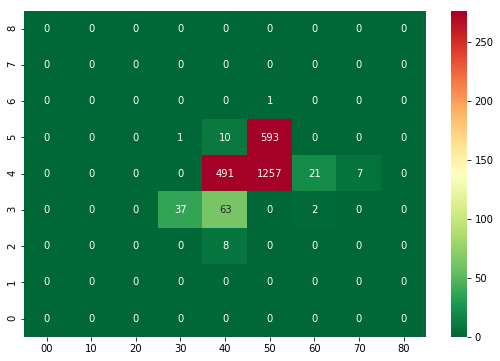

In [22]:
area = '450'
create_mobile_od_counter(area)

112.0
1505.0


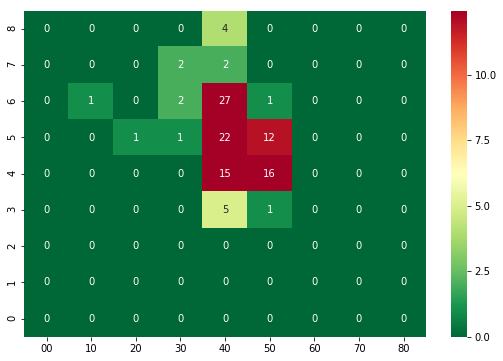

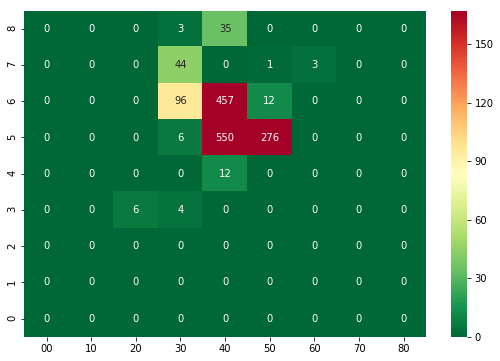

In [23]:
area = '640'
create_mobile_od_counter(area)

80.0
1274.0


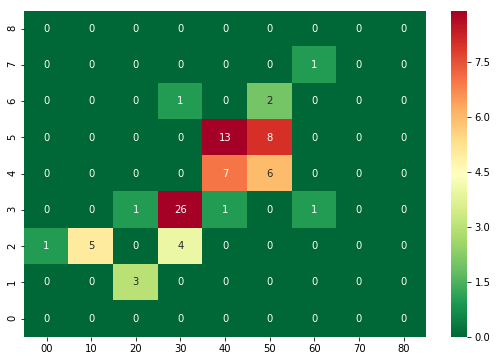

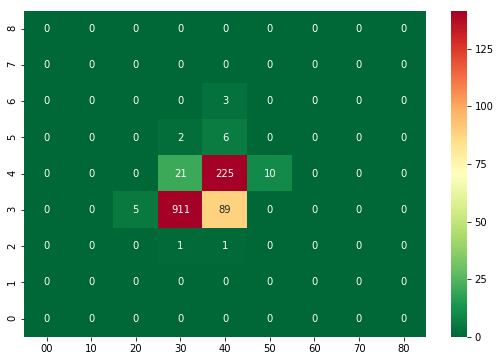

In [24]:
area = '330'
create_mobile_od_counter(area)

In [25]:
def create_diff_mobile_and_od_counter(area):
    mobile = csv_array[people][seed]['mobile'][area].copy()
    od = csv_array[people][seed]['od'][area].copy()
    diff_mobile = mobile / od
    diff_od = od / mobile
    
    create_contour(diff_mobile)
    create_contour(diff_od)

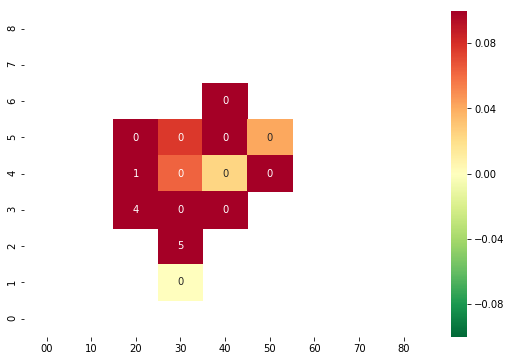

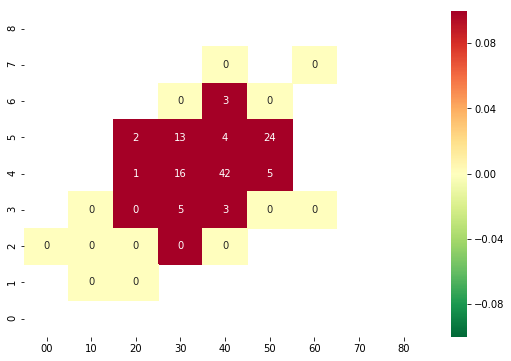

In [26]:
area = '440'
create_diff_mobile_and_od_counter(area)

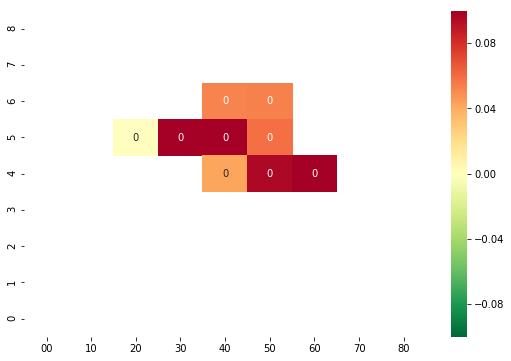

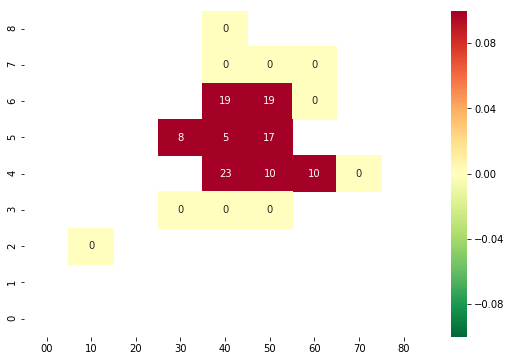

In [27]:
area = '550'
create_diff_mobile_and_od_counter(area)

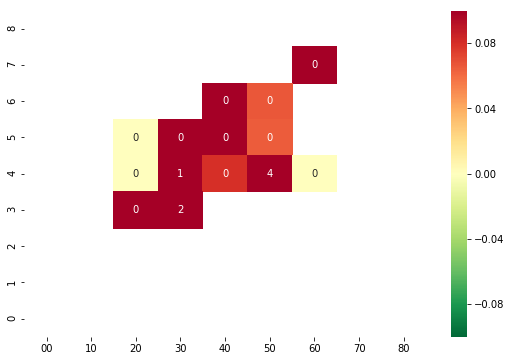

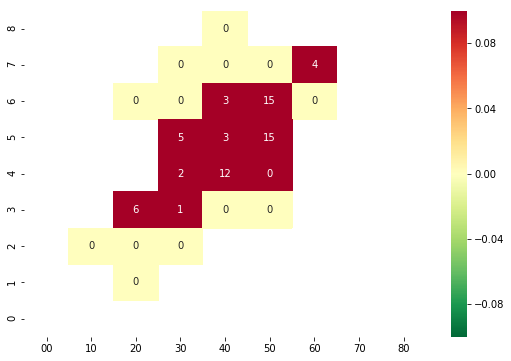

In [28]:
area = '540'
create_diff_mobile_and_od_counter(area)